In [1]:
import pandas as pd
import matplotlib.pyplot as plt

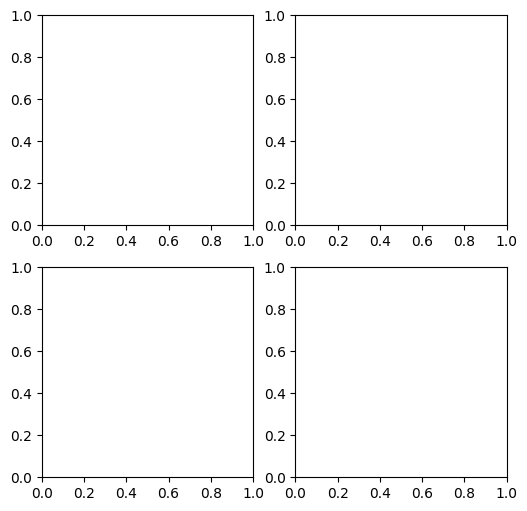

In [2]:
fig, ax = plt.subplots(2,2,figsize=(6,6))

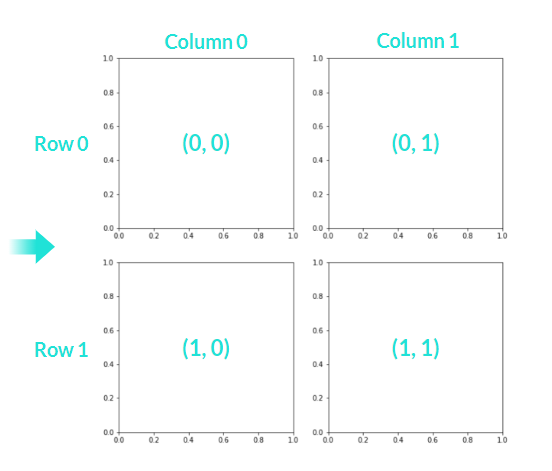

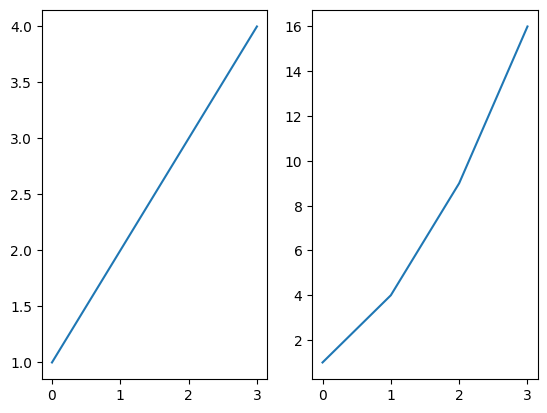

In [3]:
fig = plt.figure(2)

x = [0,1,2,3]

data = [1,2,3,4]
data2 = [1,4,9,16]

ax = fig.add_subplot(121) # grid 1x2, sendo este no 1
ax2 = fig.add_subplot(122) # grid 1x2, sendo este no 2

ax.plot(data)
ax2.plot(x, data2)

plt.show()

In [4]:
housing_raw = pd.read_csv("Data Viz with Matplotlib & Seaborn/Data/housing_data.csv",parse_dates=["period_begin", "period_end"])

ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego', 'Tulare']")
)

ca_housing_pivot = (ca_housing
                    .pivot_table(
                        index="period_begin",
                        columns="region_name",
                        values="median_active_list_price"
                    )
)

ca_housing_pivot.head(3)

region_name,Los Angeles,San Diego,San Francisco,Tulare
period_begin,,,,
2017-01-02,611561.0,618570.8,1229018.7,225395.8
2017-01-09,614061.0,621737.5,1233393.7,227729.1
2017-01-16,617311.0,625820.8,1239977.0,229060.4


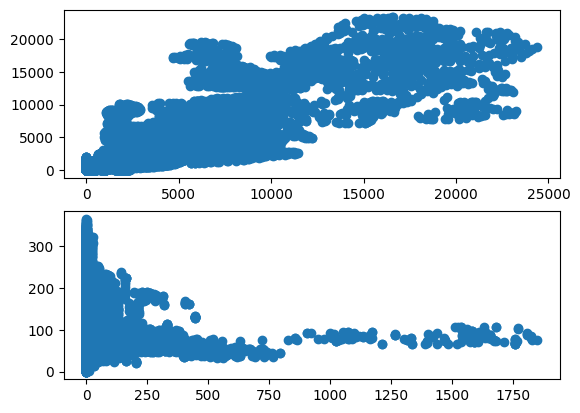

In [5]:
fig, ax = plt.subplots(2,1)

ax[0].scatter(housing_raw.loc[:,'total_homes_sold'],housing_raw.loc[:,'inventory'])
ax[1].scatter(housing_raw.loc[:,'months_of_supply'],housing_raw.loc[:,'age_of_inventory'])

In [6]:
ca_housing_pivot.head(3)

region_name,Los Angeles,San Diego,San Francisco,Tulare
period_begin,,,,
2017-01-02,611561.0,618570.8,1229018.7,225395.8
2017-01-09,614061.0,621737.5,1233393.7,227729.1
2017-01-16,617311.0,625820.8,1239977.0,229060.4


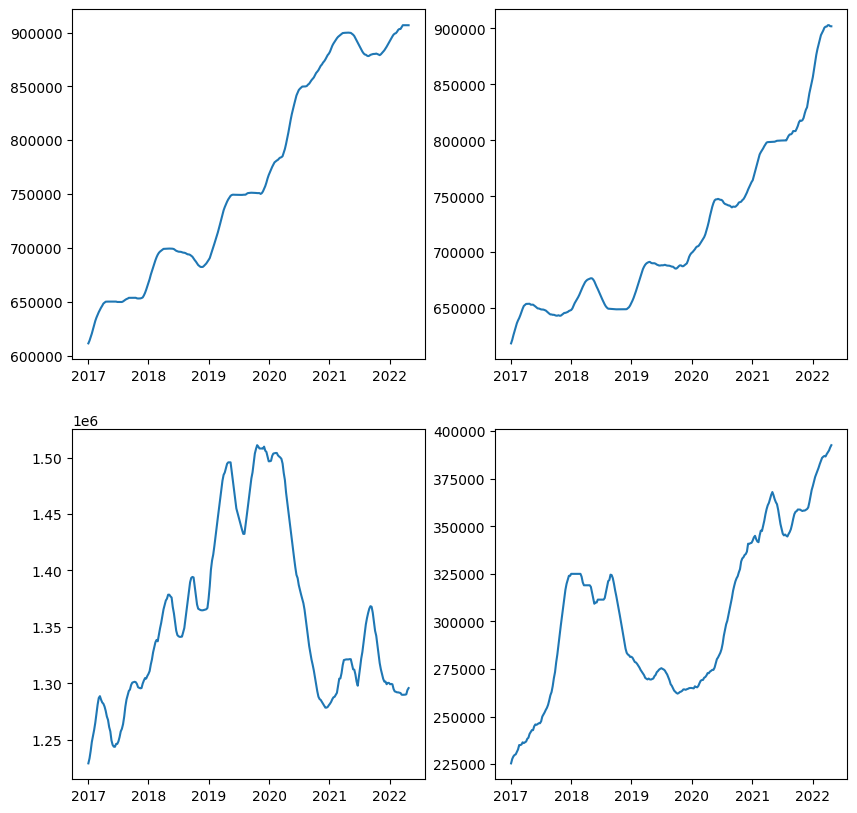

In [7]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0][0].plot(ca_housing_pivot.index,ca_housing_pivot['Los Angeles'])
ax[0][1].plot(ca_housing_pivot.index,ca_housing_pivot['San Diego'])
ax[1][0].plot(ca_housing_pivot.index,ca_housing_pivot['San Francisco'])
ax[1][1].plot(ca_housing_pivot.index,ca_housing_pivot['Tulare'])

In [8]:
hotels = pd.read_excel("Data Viz with Matplotlib & Seaborn/Data/HotelCustomersDataset.xlsx")

In [9]:
is_prt = hotels['Nationality'] == 'PRT'
more_then_15 = hotels['RoomNights'] < 15
hotels[is_prt & more_then_15].loc[:,'LodgingRevenue'].head()

0      371.0
1      280.0
20     224.0
30    1083.5
31     180.6
Name: LodgingRevenue, dtype: float64

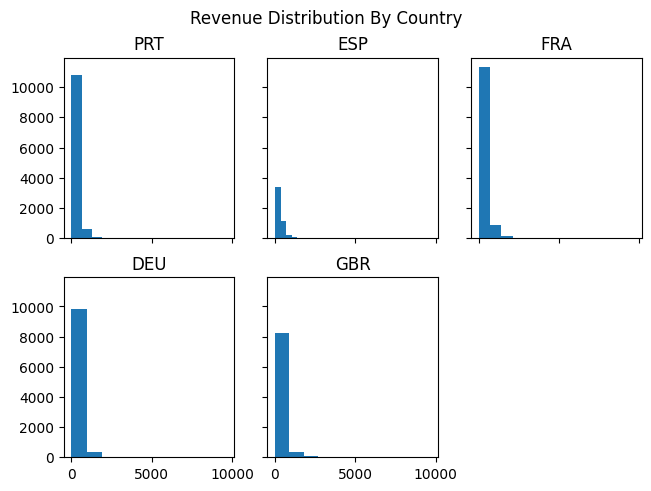

In [10]:
fig, ax = plt.subplots(2, 3, constrained_layout=True, sharex="all", sharey="all")

fig.suptitle("Revenue Distribution By Country")

ax[0][0].hist(
    hotels[is_prt & more_then_15].loc[:,'LodgingRevenue']
)
ax[0][0].set_title("PRT")

ax[0][1].hist(
    hotels[(hotels['Nationality'] == 'ESP') & (more_then_15)].loc[:,'LodgingRevenue']
)
ax[0][1].set_title("ESP")

ax[0][2].hist(
    hotels[(hotels['Nationality'] == 'FRA') & (more_then_15)].loc[:,'LodgingRevenue']
)
ax[0][2].set_title("FRA")

ax[1][0].hist(
    hotels[(hotels['Nationality'] == 'DEU') & (more_then_15)].loc[:,'LodgingRevenue']
)
ax[1][0].set_title("DEU")

ax[1][1].hist(
    hotels[(hotels['Nationality'] == 'GBR') & (more_then_15)].loc[:,'LodgingRevenue']
)
ax[1][1].set_title("GBR")

ax[1, 2].set_axis_off()

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

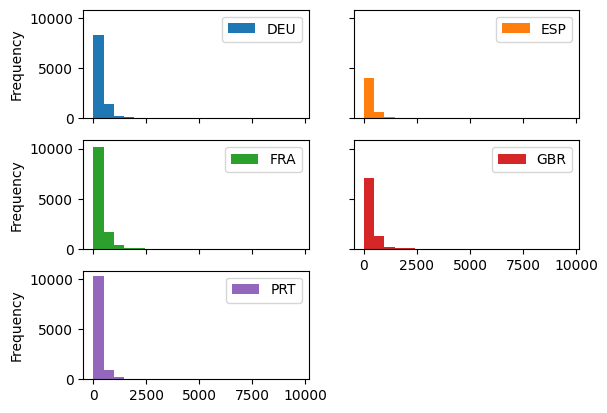

In [11]:
country_list = ["PRT", "ESP", "FRA", "DEU", "GBR"]

hotel_pivot = (
    hotels
    .query("Nationality in @country_list and RoomNights < 15")
    .pivot_table(
        index="ID",
        columns="Nationality",
        values="LodgingRevenue"
    )
)

# Pandas Plot API
hotel_pivot.plot.hist(subplots=True,
                      bins=20,
                      layout=(3, 2),
                      sharex=True,
                      sharey=True)

In [12]:
from matplotlib.gridspec import GridSpec

In [13]:
diamonds = pd.read_csv("Data Viz with Matplotlib & Seaborn/Data/Diamonds Prices2022.csv").drop(['Unnamed: 0'], axis=1)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


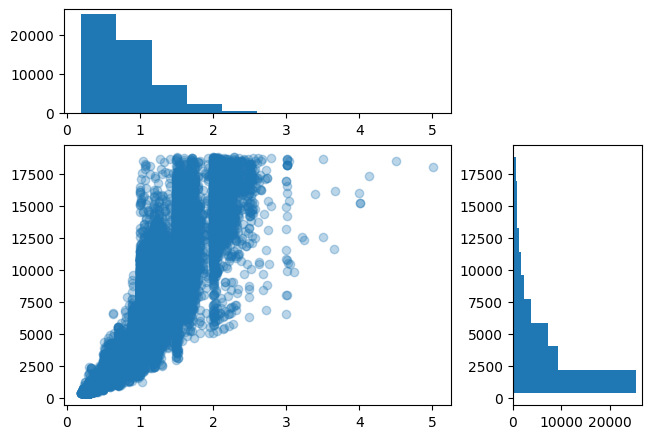

In [14]:
fig = plt.figure(constrained_layout=True)

grid = GridSpec(8, 8, figure=fig)

ax1 = fig.add_subplot(grid[2:7, 0:6])

ax1.scatter(
    diamonds["carat"], 
    diamonds["price"],
    alpha=.3
           )

ax2 = fig.add_subplot(grid[0:2, 0:6])

ax2.hist(diamonds["carat"])
ax3 = fig.add_subplot(grid[2:7, 6:])
ax3.hist(diamonds["price"],
        orientation="horizontal")

plt.show()

In [15]:
# Line Chart Data Prep

hotels = hotels.assign(
    date=pd.to_datetime("2018-12-31") - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D"),
    total_revenue=hotels["LodgingRevenue"] + hotels["OtherRevenue"],
)


monthly_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue": "sum", "OtherRevenue": "sum", "total_revenue": "sum"})
    .resample("M")
    .sum()
)

monthly_revenue.head()

C:\Users\f0fp0228\AppData\Local\Temp\ipykernel_5156\2367231643.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


,LodgingRevenue,OtherRevenue,total_revenue
date,,,
2016-01-31,124531.34,52190.50,176721.84
2016-02-29,131689.12,51203.13,182892.25
2016-03-31,443476.86,127336.11,570812.97
2016-04-30,500966.80,145228.87,646195.67
2016-05-31,634200.17,143359.35,777559.52


In [16]:
rev_by_country = (
    hotels.groupby('Nationality').agg({'total_revenue':'sum'}).sort_values('total_revenue', ascending=False).iloc[:5]
)

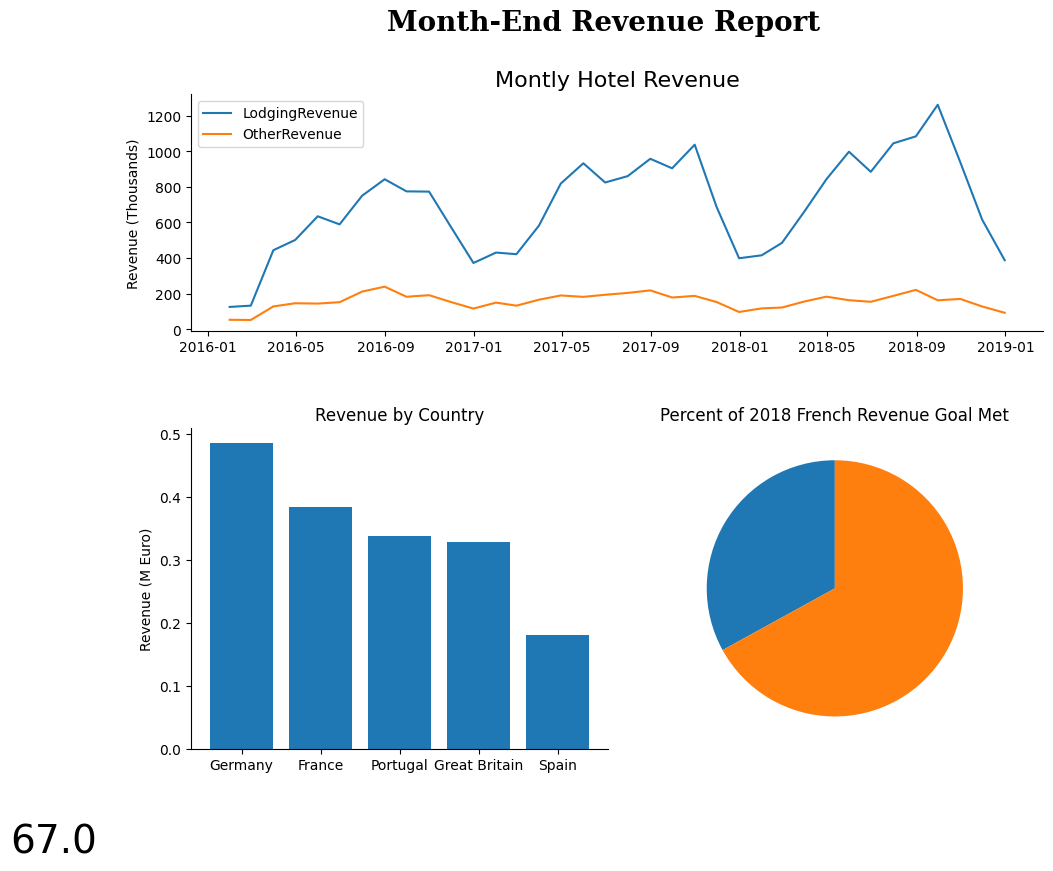

In [17]:
fig = plt.figure(figsize=(11,8.5))

gs = GridSpec(nrows=8, ncols=8)

fig.suptitle('Month-End Revenue Report', fontsize=20, fontweight='bold', fontfamily='serif')

ax1 = fig.add_subplot(gs[0:3,:])

ax1.plot(
    monthly_revenue.index,
    monthly_revenue['LodgingRevenue'] / 1000,
    label = 'LodgingRevenue'
)

ax1.plot(
    monthly_revenue.index,
    monthly_revenue['OtherRevenue'] / 1000,
    label = 'OtherRevenue'
)

ax1.set_title('Montly Hotel Revenue', fontsize=16)
ax1.set_ylabel('Revenue (Thousands)')

ax1.legend(loc='upper left')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Bar Charts
ax2 = fig.add_subplot(gs[4:,:4])

ax2.bar(
    x=rev_by_country.index,
    height=rev_by_country['total_revenue'] / 1_000_0000
)

ax2.set_title('Revenue by Country')
ax2.set_xticks(range(len(rev_by_country.index)))
ax2.set_xticklabels(['Germany','France','Portugal','Great Britain','Spain'])
ax2.set_ylabel('Revenue (M Euro)')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Pie Chart
ax3 = fig.add_subplot(gs[4:,4:])

pie_list = [.33,.67]

ax3.pie(
    pie_list,
    startangle=90,
    labels=['',''],
    pctdistance=.85
)

hole = plt.Circle((0,0),0.70, fc='white')
fig.text(
    0,0,
    f'{pie_list[1] * 100}',
    ha='center',
    va='center',
    fontsize=28
)

ax3.set_title('Percent of 2018 French Revenue Goal Met', fontsize=12)

plt.show()

In [18]:
ca_housing_pivot.head()

region_name,Los Angeles,San Diego,San Francisco,Tulare
period_begin,,,,
2017-01-02,611561.0,618570.8,1229018.7,225395.8
2017-01-09,614061.0,621737.5,1233393.7,227729.1
2017-01-16,617311.0,625820.8,1239977.0,229060.4
2017-01-23,620644.3,629491.6,1247977.0,229806.2
2017-01-30,624541.6,632824.0,1253310.4,230139.5


In [19]:
ca_housing_pivot.iloc[2:3,2:3]

region_name,San Francisco
period_begin,
2017-01-16,1239977.0


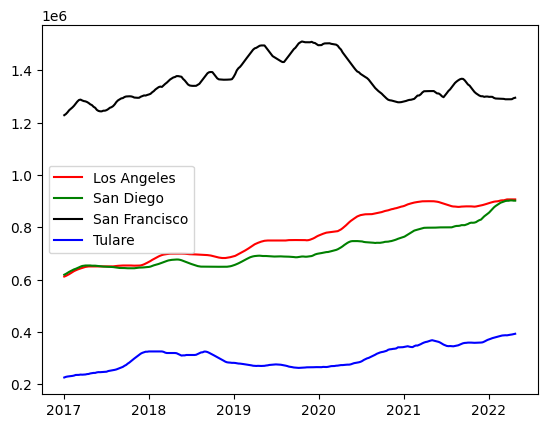

In [21]:
fig, ax = plt.subplots()

colors = ['red','green','black','blue']

for i, color in enumerate(colors):
    ax.plot(
        ca_housing_pivot.index,
        ca_housing_pivot.iloc[:,i],
        c=color,
        label=ca_housing_pivot.columns[i]
    )

ax.legend()

In [22]:
data = [x for x in range(10)]
dat2 = [x * 2 for x in range(10)]

In [31]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['red','orange','grey','green'])

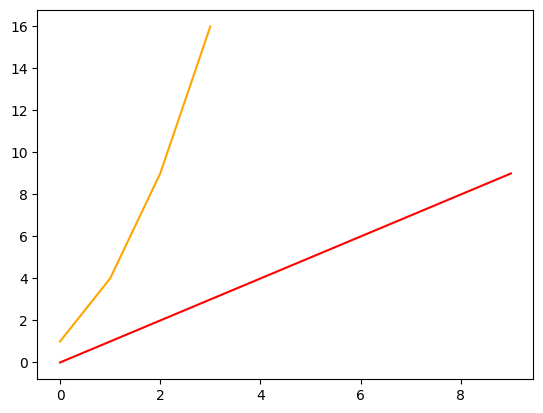

In [ ]:
fig ,ax = plt.subplots()

ax.plot(
    data,    
)

ax.plot(
    data2,
)

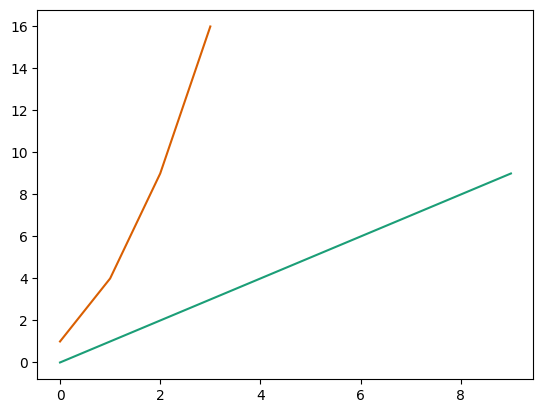

In [33]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

fig ,ax = plt.subplots()

ax.plot(
    data,    
)

ax.plot(
    data2,
)

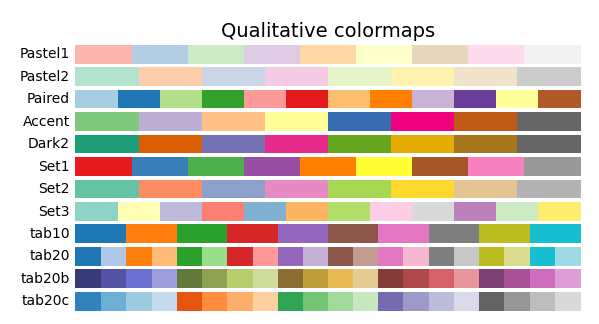

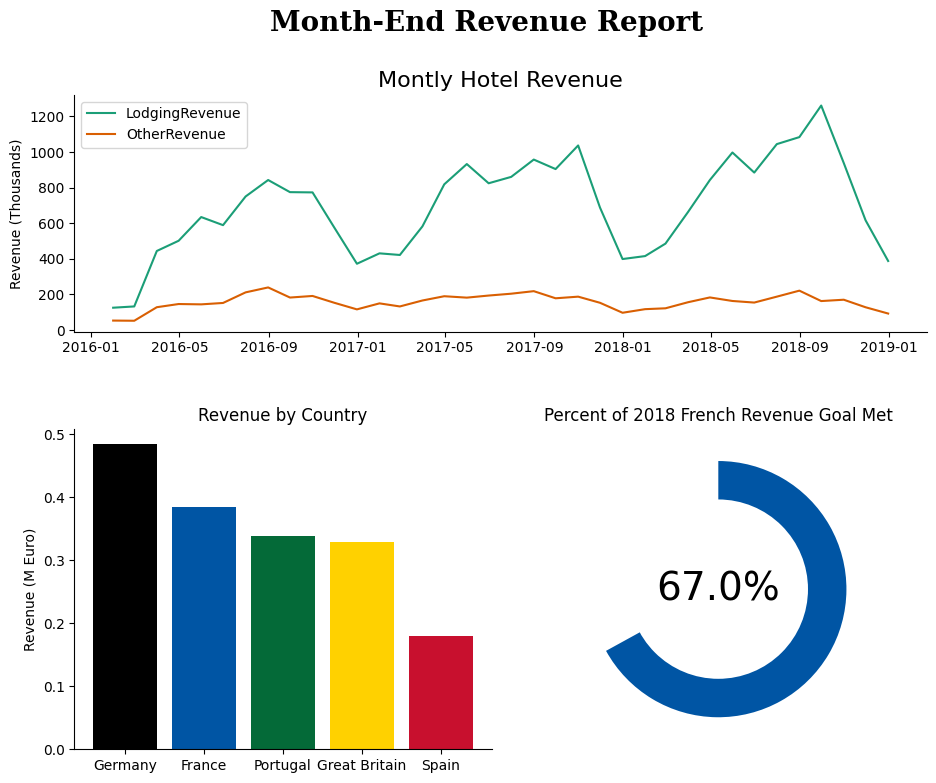

In [43]:
fig = plt.figure(figsize=(11,8.5))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

gs = GridSpec(nrows=8, ncols=8)

fig.suptitle('Month-End Revenue Report', fontsize=20, fontweight='bold', fontfamily='serif')

ax1 = fig.add_subplot(gs[0:3,:])

ax1.plot(
    monthly_revenue.index,
    monthly_revenue['LodgingRevenue'] / 1000,
    label = 'LodgingRevenue'
)

ax1.plot(
    monthly_revenue.index,
    monthly_revenue['OtherRevenue'] / 1000,
    label = 'OtherRevenue'
)

ax1.set_title('Montly Hotel Revenue', fontsize=16)
ax1.set_ylabel('Revenue (Thousands)')

ax1.legend(loc='upper left')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Bar Charts
ax2 = fig.add_subplot(gs[4:,:4])
colors = ['black','#0055A4', '#046A38','#FFD100','#C8102E']

ax2.bar(
    x=rev_by_country.index,
    height=rev_by_country['total_revenue'] / 1_000_0000,
    color=colors,
)

ax2.set_title('Revenue by Country')
ax2.set_xticks(range(len(rev_by_country.index)))
ax2.set_xticklabels(['Germany','France','Portugal','Great Britain','Spain'])
ax2.set_ylabel('Revenue (M Euro)')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Pie Chart
ax3 = fig.add_subplot(gs[4:,4:])

pie_list = [.33,.67]

ax3.pie(
    pie_list,
    startangle=90,
    labels=['',''],
    pctdistance=.85,
    colors = ['white', '#0055A4']
)

hole = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0, 0, 
    f"{pie_list[1] * 100}%", 
    ha="center", 
    va="center", 
    fontsize=28
)

ax3.set_title('Percent of 2018 French Revenue Goal Met', fontsize=12)

plt.show()

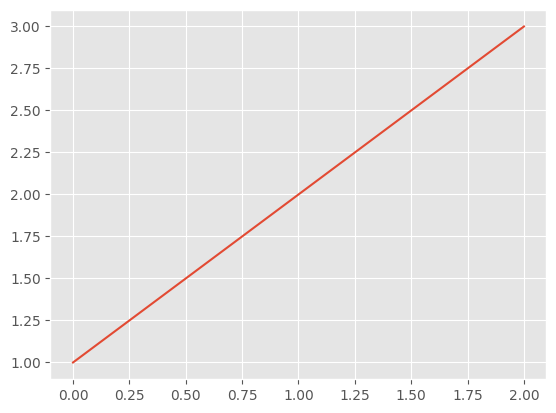

In [46]:
plt.style.use('ggplot')
plt.plot([1,2,3])

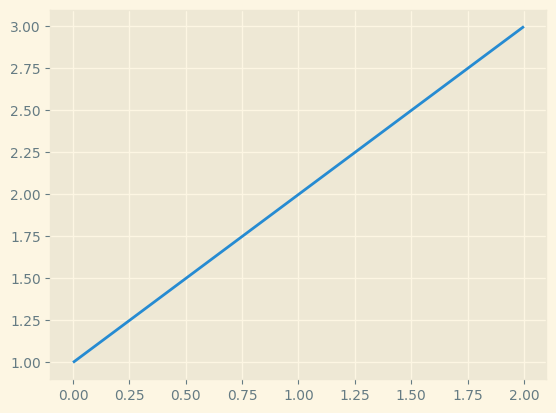

In [47]:
plt.style.use('Solarize_Light2')
plt.plot([1,2,3])

In [50]:
import seaborn as sns

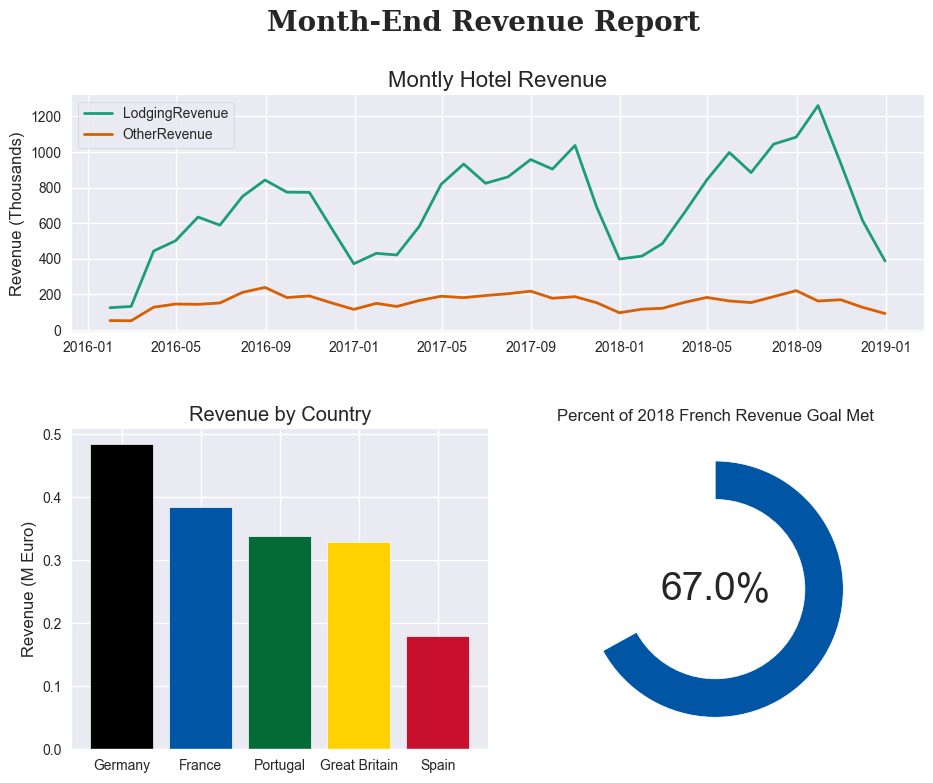

In [51]:
sns.set_style('darkgrid')

fig = plt.figure(figsize=(11,8.5))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

gs = GridSpec(nrows=8, ncols=8)

fig.suptitle('Month-End Revenue Report', fontsize=20, fontweight='bold', fontfamily='serif')

ax1 = fig.add_subplot(gs[0:3,:])

ax1.plot(
    monthly_revenue.index,
    monthly_revenue['LodgingRevenue'] / 1000,
    label = 'LodgingRevenue'
)

ax1.plot(
    monthly_revenue.index,
    monthly_revenue['OtherRevenue'] / 1000,
    label = 'OtherRevenue'
)

ax1.set_title('Montly Hotel Revenue', fontsize=16)
ax1.set_ylabel('Revenue (Thousands)')

ax1.legend(loc='upper left')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Bar Charts
ax2 = fig.add_subplot(gs[4:,:4])
colors = ['black','#0055A4', '#046A38','#FFD100','#C8102E']

ax2.bar(
    x=rev_by_country.index,
    height=rev_by_country['total_revenue'] / 1_000_0000,
    color=colors,
)

ax2.set_title('Revenue by Country')
ax2.set_xticks(range(len(rev_by_country.index)))
ax2.set_xticklabels(['Germany','France','Portugal','Great Britain','Spain'])
ax2.set_ylabel('Revenue (M Euro)')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Pie Chart
ax3 = fig.add_subplot(gs[4:,4:])

pie_list = [.33,.67]

ax3.pie(
    pie_list,
    startangle=90,
    labels=['',''],
    pctdistance=.85,
    colors = ['white', '#0055A4']
)

hole = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0, 0, 
    f"{pie_list[1] * 100}%", 
    ha="center", 
    va="center", 
    fontsize=28
)

ax3.set_title('Percent of 2018 French Revenue Goal Met', fontsize=12)

plt.show()

In [52]:
plt.style.library['seaborn-v0_8-darkgrid']

RcParams({'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.grid': True,
          'axes.labelcolor': '.15',
          'axes.linewidth': 0.0,
          'figure.facecolor': 'white',
          'font.family': ['sans-serif'],
          'font.sans-serif': ['Arial',
                              'Liberation Sans',
                              'DejaVu Sans',
                              'Bitstream Vera Sans',
                              'sans-serif'],
          'grid.color': 'white',
          'grid.linestyle': '-',
          'image.cmap': 'Greys',
          'legend.frameon': False,
          'legend.numpoints': 1,
          'legend.scatterpoints': 1,
          'lines.solid_capstyle': <CapStyle.round: 'round'>,
          'text.color': '.15',
          'xtick.color': '.15',
          'xtick.direction': 'out',
          'xtick.major.size': 0.0,
          'xtick.minor.size': 0.0,
          'ytick.color': '.15',
          'ytic

In [56]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'bo

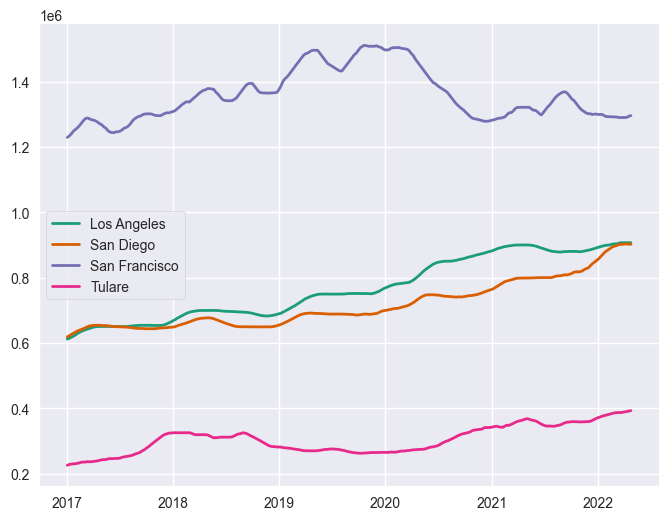

In [ ]:
plt.rc('axes.spines', right=False, top=False)
plt.rc('axes', titlesize=20)
plt.rcParams['figure.figsize'] = (8,6)

fig, ax = plt.subplots()

for i, color in enumerate(colors):
    ax.plot(
        ca_housing_pivot.index,
        ca_housing_pivot.iloc[:,i],
        label=ca_housing_pivot.columns[i]
    )

ax.legend()

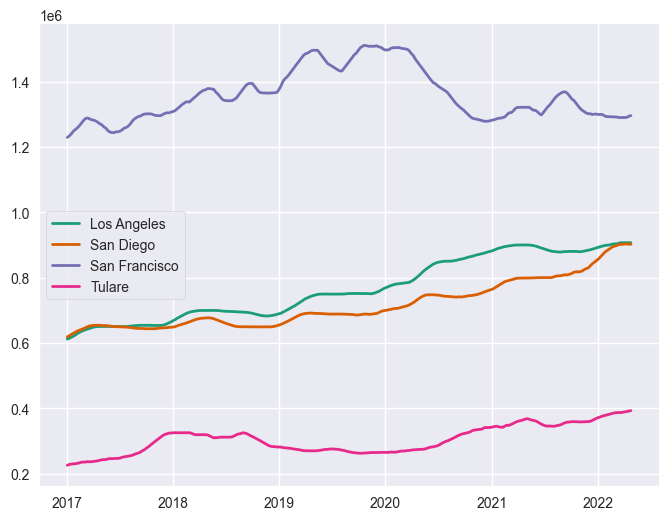

In [59]:
plt.rc('axes.spines', right=False, top=False)
plt.rc('axes', titlesize=20)
plt.rcParams['figure.figsize'] = (8,6)

fig, ax = plt.subplots()

for i, color in enumerate(colors):
    ax.plot(
        ca_housing_pivot.index,
        ca_housing_pivot.iloc[:,i],
        label=ca_housing_pivot.columns[i]
    )

ax.legend()
plt.savefig('grafico_01.png', dpi=1000)